# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf  
from time import time 
import datetime
from statsmodels.tsa.stattools import adfuller 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
#importing TCS[TATA CONSULTANCY SERVICES] stock data from NATIONAL STOCK EXCHANGE[NS]
ticker="TCS.NS"
data=yf.Ticker(ticker)

In [3]:
end_date=datetime.date.today()
end_date

datetime.date(2024, 7, 9)

In [4]:
start_date=end_date-datetime.timedelta(days=730)
start_date

datetime.date(2022, 7, 10)

In [5]:
tomorrow_date=end_date+datetime.timedelta(days=1)
tomorrow_date

datetime.date(2024, 7, 10)

In [6]:
prices=data.history(start=start_date,end=end_date).Close
prices

Date
2022-07-11 00:00:00+05:30    2962.736084
2022-07-12 00:00:00+05:30    2935.047852
2022-07-13 00:00:00+05:30    2891.327148
2022-07-14 00:00:00+05:30    2860.798828
2022-07-15 00:00:00+05:30    2856.840332
                                ...     
2024-07-02 00:00:00+05:30    4017.399902
2024-07-03 00:00:00+05:30    3965.250000
2024-07-04 00:00:00+05:30    4020.949951
2024-07-05 00:00:00+05:30    4011.800049
2024-07-08 00:00:00+05:30    3993.199951
Name: Close, Length: 490, dtype: float64

In [7]:
prices_df=pd.DataFrame(prices)
prices_df.columns=['prices']
prices_df

,prices
Date,
2022-07-11 00:00:00+05:30,2962.736084
2022-07-12 00:00:00+05:30,2935.047852
2022-07-13 00:00:00+05:30,2891.327148
2022-07-14 00:00:00+05:30,2860.798828
2022-07-15 00:00:00+05:30,2856.840332
...,...
2024-07-02 00:00:00+05:30,4017.399902
2024-07-03 00:00:00+05:30,3965.250000
2024-07-04 00:00:00+05:30,4020.949951


In [8]:
returns=prices.pct_change().dropna()
returns_df=pd.DataFrame(returns)
returns_df.columns=['returns']
returns_df

,returns
Date,
2022-07-12 00:00:00+05:30,-0.009345
2022-07-13 00:00:00+05:30,-0.014896
2022-07-14 00:00:00+05:30,-0.010559
2022-07-15 00:00:00+05:30,-0.001384
2022-07-18 00:00:00+05:30,0.023008
...,...
2024-07-02 00:00:00+05:30,0.009854
2024-07-03 00:00:00+05:30,-0.012981
2024-07-04 00:00:00+05:30,0.014047


In [9]:
# DICKEY FULLER TEST FUNCTION
def af_test(prices):
    result=adfuller(prices)
    labels=['AD TEST STATISTICS','p-value','Lags Used','No.Of.Observations Used']
    for i,j in zip(result,labels):
        print(j+" : "+str(i))
    if(result[1]>0.05):
        print("DATA IS NOT STATIONARY")
    else:
        print("DATA IS STATIONARY")

In [10]:
af_test(prices_df['prices'])

AD TEST STATISTICS : -1.1302973673728658
p-value : 0.7028397112492653
Lags Used : 0
No.Of.Observations Used : 489
DATA IS NOT STATIONARY


Text(0.5, 1.0, 'Time-Series plot for Prices')

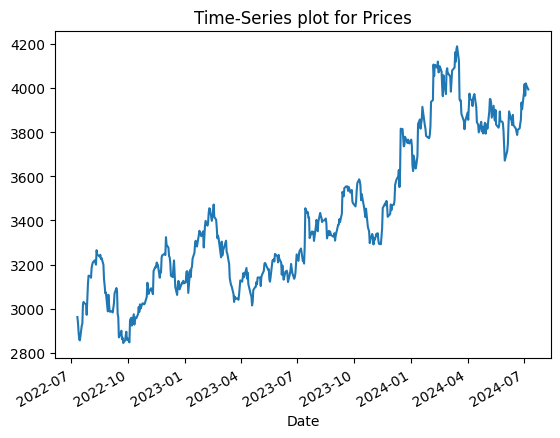

In [11]:
fig1=prices_df['prices'].plot()
fig1.set_title("Time-Series plot for Prices")

In [12]:
af_test(returns_df['returns'])

AD TEST STATISTICS : -22.420538732690083
p-value : 0.0
Lags Used : 0
No.Of.Observations Used : 488
DATA IS STATIONARY


Text(0.5, 1.0, 'Time-Series plot for Returns')

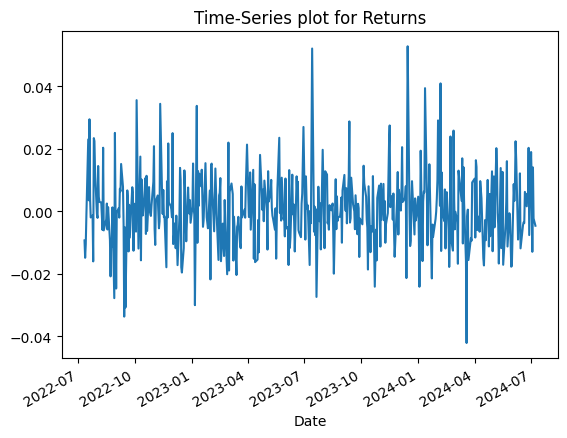

In [13]:
fig12=returns_df['returns'].plot()
fig12.set_title("Time-Series plot for Returns")

In [14]:
prices_df['first difference']=prices_df['prices']-prices_df['prices'].shift(1)
prices_df

,prices,first difference
Date,,
2022-07-11 00:00:00+05:30,2962.736084,NaN
2022-07-12 00:00:00+05:30,2935.047852,-27.688232
2022-07-13 00:00:00+05:30,2891.327148,-43.720703
2022-07-14 00:00:00+05:30,2860.798828,-30.528320
2022-07-15 00:00:00+05:30,2856.840332,-3.958496
...,...,...
2024-07-02 00:00:00+05:30,4017.399902,39.199951
2024-07-03 00:00:00+05:30,3965.250000,-52.149902
2024-07-04 00:00:00+05:30,4020.949951,55.699951


In [15]:
af_test(prices_df['first difference'].dropna())

AD TEST STATISTICS : -22.357006651145856
p-value : 0.0
Lags Used : 0
No.Of.Observations Used : 488
DATA IS STATIONARY


Text(0.5, 1.0, 'Time Series Plot after Differencing')

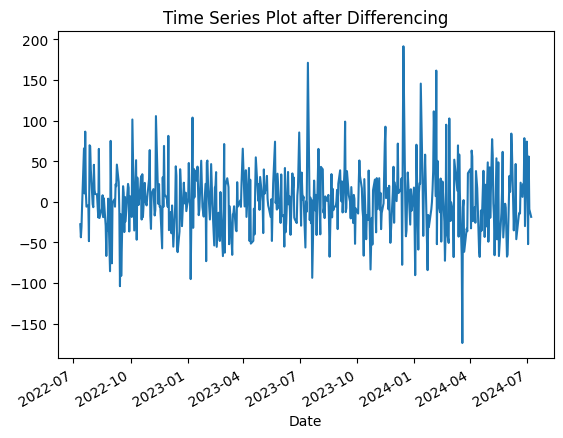

In [16]:
fig2=prices_df['first difference'].plot()
fig2.set_title("Time Series Plot after Differencing")

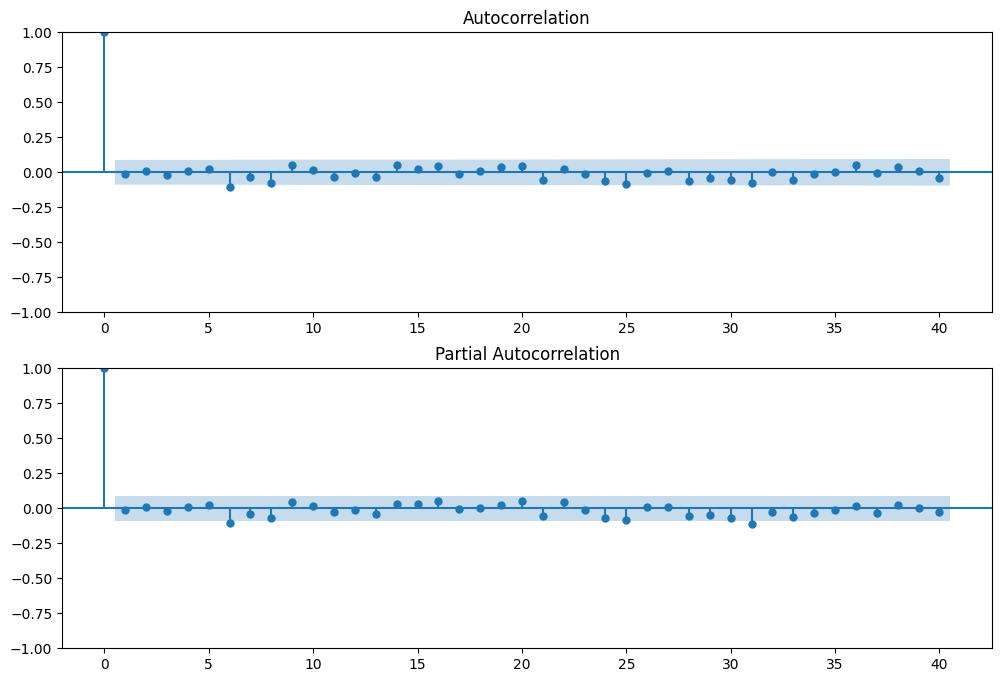

In [17]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(prices_df['first difference'].dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(prices_df['first difference'].dropna(),lags=40,ax=ax2)

In [18]:
# ACF AND PACF DOES NOT HELP SIGNIFICANTLY IN CHOOSING BETWEEN AR AND MA Model
# SO WE ARE FINDING THE BEST p,d,q BY TRIAL AND ERROR 

# Building ARIMA Model For Stock-Prices

In [19]:
model1=ARIMA(prices_df['prices'],order=(7,0,6))
model1_fit=model1.fit()
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 prices   No. Observations:                  490
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -2515.720
Date:                Tue, 09 Jul 2024   AIC                           5061.440
Time:                        23:26:15   BIC                           5124.356
Sample:                             0   HQIC                          5086.149
                                - 490                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3411.3177    304.753     11.194      0.000    2814.012    4008.623
ar.L1          1.1527      0.434      2.658      0.008       0.303       2.003
ar.L2          0.1507      0.578      0.261      0.794      -0.981       1.283
ar.L3         -0.7665      0.392     -1.957      0.050      -1.534       0.001
ar.L4          0.2878      0.536      0.537      0.591      -0.763       1.338
ar.L5          0.6814      0.373      1.827      0.068      -0.050       1.412
ar.L6         -0.4574      0.552     -0.829      0.407      -1.539       0.624
ar.L7         -0.0511      0.398     -0.128      0.898      -0.831       0.729
ma.L1         -0.1679      0.427     -0.393      0.694      -1.005       0.669
ma.L2         -0.2799      0.307     -0.912      0.362      -0.881       0.322
ma.L3          0.4617      0.322      1.436      0.151      -0.169       1.092
ma.L4          0.1796      0.312      0.576      0.565      -0.432       0.791
ma.L5         -0.5024      0.299     -1.682      0.093      -1.088       0.083
ma.L6         -0.1637      0.412     -0.397      0.691      -0.972       0.645
sigma2      1676.4761     85.201     19.677      0.000    1509.485    1843.467
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               116.82
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#Predicting stock prices for 200 days
prices_df['forecast']=model1_fit.predict(start=0,end=200,dynamic=False)
prices_df.head(135)

,prices,first difference,forecast
Date,,,
2022-07-11 00:00:00+05:30,2962.736084,NaN,3411.317650
2022-07-12 00:00:00+05:30,2935.047852,-27.688232,2964.976210
2022-07-13 00:00:00+05:30,2891.327148,-43.720703,2937.580807
2022-07-14 00:00:00+05:30,2860.798828,-30.528320,2893.588528
2022-07-15 00:00:00+05:30,2856.840332,-3.958496,2863.067970
...,...,...,...
2023-01-17 00:00:00+05:30,3296.780762,43.278076,3242.522938
2023-01-18 00:00:00+05:30,3308.100830,11.320068,3305.168012
2023-01-19 00:00:00+05:30,3291.609375,-16.491455,3301.968402


<Axes: xlabel='Date'>

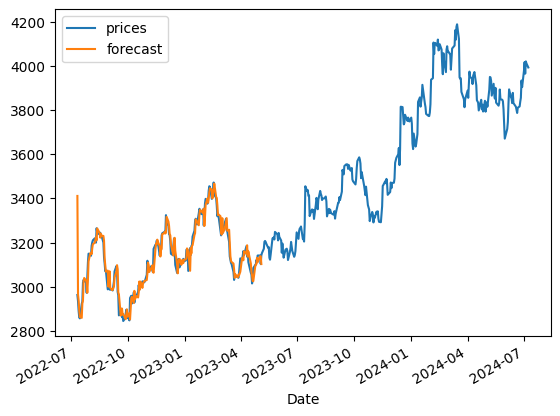

In [21]:
prices_df[['prices','forecast']].plot()

In [22]:
#THE MODEL WORKS PERFECTLY FINE

In [23]:
#PERFORMING THE FORECAST for the next day after "end-date"
next_days_price=model1_fit.forecast(100,alpha=0.01)
next_days_price.iloc[0]

3981.20579991238

# Building SARIMAX Model For Returns

In [24]:
af_test(returns_df['returns'])

AD TEST STATISTICS : -22.420538732690083
p-value : 0.0
Lags Used : 0
No.Of.Observations Used : 488
DATA IS STATIONARY


In [25]:
# HERE WE CAN SEE THAT THE 'RETURNS' DATA IS STATIONARY
# Even if the data appears stationary visually, differencing might be a pre-processing step to ensure compatibility with the chosen model
# The chosen model here is SARIMAX

In [26]:
#TRYING TO PREDICT RETURNS PERCENTAGE USING SARIMAX
model2=sm.tsa.statespace.SARIMAX(returns_df['returns'],order=(1,2,1),seasonal_order=(1,2,1,24))
model2_fit=model2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.80302D+00    |proj g|=  1.46639D+01


 This problem is unconstrained.



At iterate    5    f= -2.04795D+00    |proj g|=  2.30490D-01

At iterate   10    f= -2.06044D+00    |proj g|=  6.59989D+00

At iterate   15    f= -2.09664D+00    |proj g|=  1.70289D-01

At iterate   20    f= -2.10539D+00    |proj g|=  1.93126D+00

At iterate   25    f= -2.13884D+00    |proj g|=  4.90488D+00

At iterate   30    f= -2.16323D+00    |proj g|=  3.05032D-01

At iterate   35    f= -2.16370D+00    |proj g|=  5.42429D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -2.16370D+00    |proj g|=  7.51097D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     96      2     0     0   7.511D-03  -2.164D+00
  F =  -2.1636966193030132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [27]:
#Predicting The returns for 400 days
returns_df['forecast']=model2_fit.predict(start=0,end=400,dynamic=False)
returns_df.head(135)

,returns,forecast
Date,,
2022-07-12 00:00:00+05:30,-0.009345,0.000000
2022-07-13 00:00:00+05:30,-0.014896,-0.016355
2022-07-14 00:00:00+05:30,-0.010559,-0.020447
2022-07-15 00:00:00+05:30,-0.001384,-0.006221
2022-07-18 00:00:00+05:30,0.023008,0.007791
...,...,...
2023-01-18 00:00:00+05:30,0.003434,0.017370
2023-01-19 00:00:00+05:30,-0.004985,-0.020134
2023-01-20 00:00:00+05:30,-0.002965,-0.014307


<Axes: xlabel='Date'>

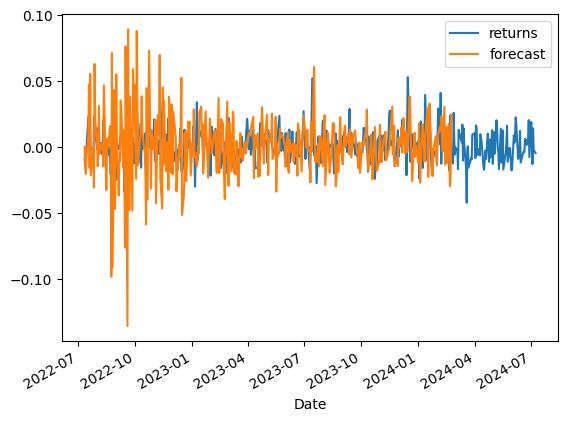

In [28]:
returns_df[['returns','forecast']].plot()

In [29]:
next_days_returns=model2_fit.forecast(100,alpha=0.05)
next_days_returns.iloc[0]

0.006904041083143506

# Saving The ARIMA model For Instant Stock price Forecasting

In [30]:
import joblib
joblib.dump(model1_fit, 'model.joblib')

['Model/stockmodel.joblib']